# Tutorial for analyzing instrumental learning data with the HDDMnnRL module

In [2]:
import hddm
import pickle
import pandas as pd

#### Load the data
- **response**: 0 or 1 - defines chosen stimulus.
- **rt**: reaction times (seconds) for each trial (same as HDDM/HDDMnn class).
- **subj_idx**: subject id (same as HDDM/HDDMnn class)
- **split_by**: identifies the different task conditions (as integers)
- **trial**: trial number for each participant (must be in ascending order within each subject and condition).
- **feedback**: reward (binary or otherwise) received for the chosen option on each trial.
- **q_init**: used to initialize expected rewards.

In [7]:
# Load the data (RWupdate+angle)
data = pd.read_csv('rlssm_data.csv')

In [4]:
data

,response,rt,feedback,subj_idx,split_by,trial,q_init
0,0.0,2.729579,0.0,0,0,1,0.5
1,1.0,3.090593,1.0,0,0,2,0.5
2,1.0,3.892617,1.0,0,0,3,0.5
3,1.0,2.429583,1.0,0,0,4,0.5
4,1.0,2.566581,1.0,0,0,5,0.5
...,...,...,...,...,...,...,...
29995,1.0,3.381547,1.0,19,2,496,0.5
29996,1.0,3.324544,0.0,19,2,497,0.5
29997,1.0,3.132535,0.0,19,2,498,0.5
29998,0.0,3.206539,0.0,19,2,499,0.5


#### Initialize the HDDMnnRL model and sample

In [5]:
# Specify number of samples and burnins
nsamples = 1000
nburn = 500

In [6]:
m = hddm.HDDMnnRL(
    data,
    model="angle",
    rl_rule="RWupdate",
    non_centered=True,
    include=["z", "theta", "rl_alpha"],
    p_outlier=0.0,
)
m.sample(nsamples, burn=nburn, dbname="traces.db", db="pickle")


Printing model specifications -- 
ssm:  angle
rl rule:  RWupdate
using non-centered dist.:  True
Using default priors: Uninformative
Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10
Using non-centered distributions.


wfpt_parents =  OrderedDict([('v', v_subj), ('a', a_subj), ('z', z_subj), ('t', t_subj), ('theta', theta_subj), ('rl_alpha', rl_alpha_subj), ('p_outlier', 0.0), ('w_outlier', 0.1)])
 [-----------------100%-----------------] 1001 of 1000 complete in 3773.5 sec

#### Save the model

In [7]:
# Save the model
m.save("rlssm_model")

In [ ]:
# Load the model
model = hddm.load("rlssm_model")

#### Check the posterior results

Plotting v
Plotting v_std
Plotting a
Plotting a_std
Plotting z
Plotting z_std
Plotting t
Plotting t_std
Plotting theta
Plotting theta_std
Plotting rl_alpha
Plotting rl_alpha_std


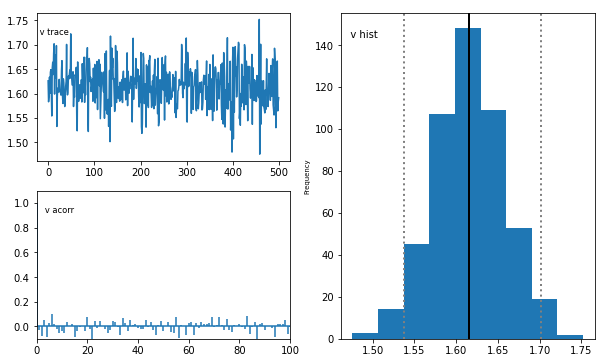

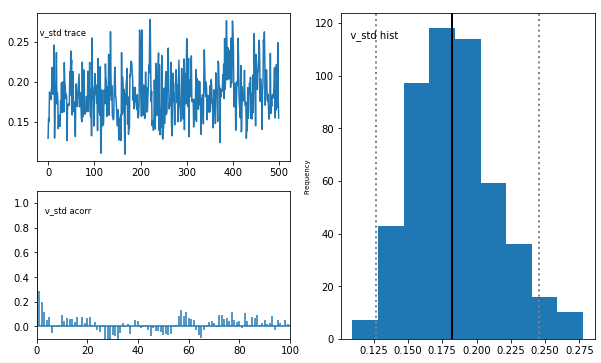

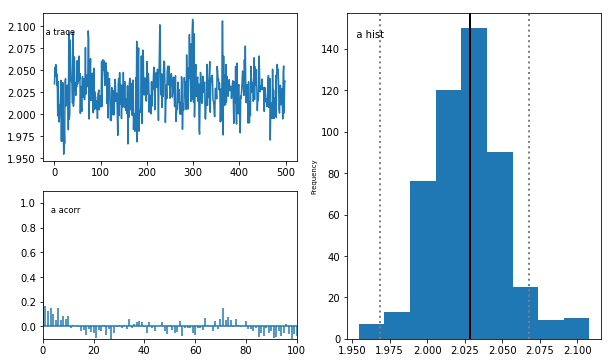

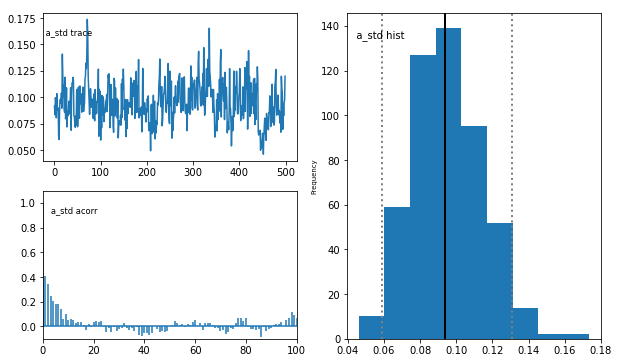

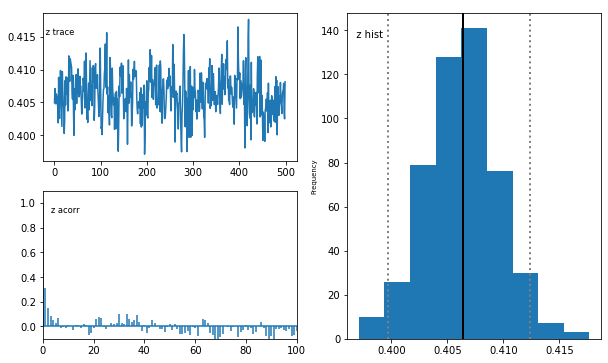

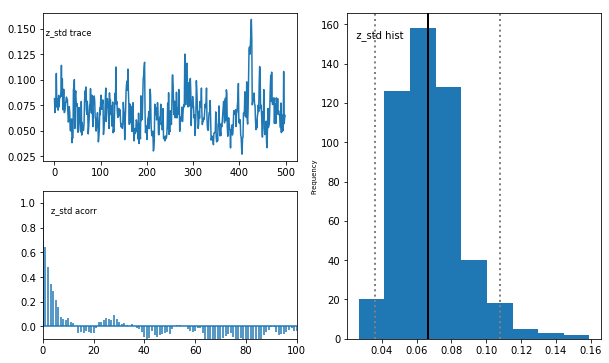

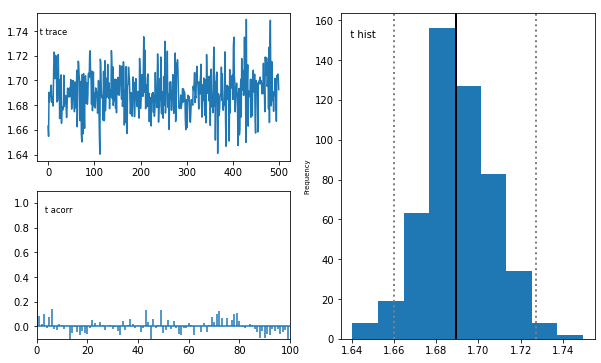

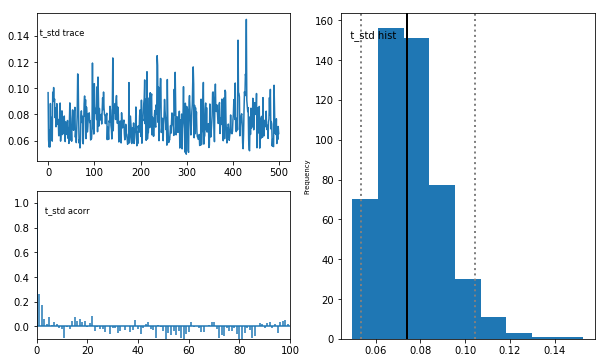

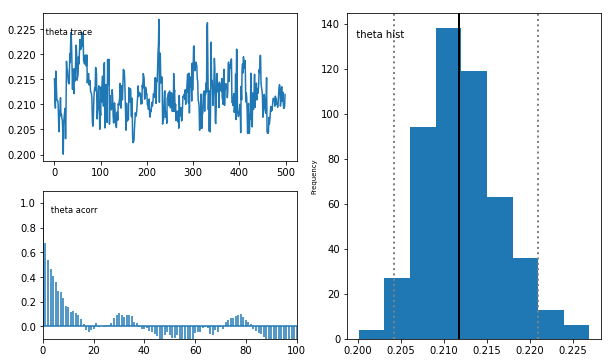

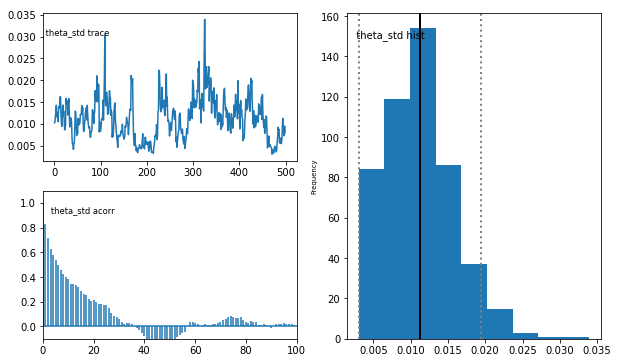

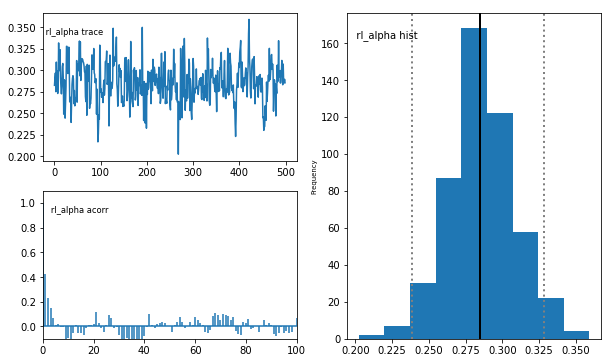

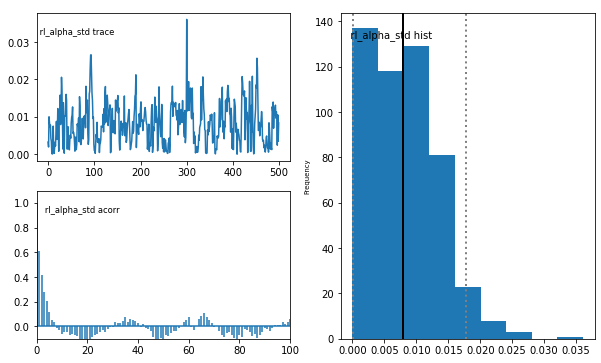

In [8]:
m.plot_posteriors()

In [ ]:
tp = 0.5
np.exp(tp)/(1+np.exp(tp))

In [9]:
# Load the trace
with open("./traces.db", "rb") as handle:
    tracefile = pickle.load(handle)

In [10]:
# Re-format traces as a dataframe
traces = hddm.utils.get_traces_rlssm(tracefile)

In [11]:
model_ssm = "angle"
model_rl = "RWupdate"

config_ssm = hddm.model_config.model_config[model_ssm]
config_rl = hddm.model_config_rl.model_config_rl[model_rl]

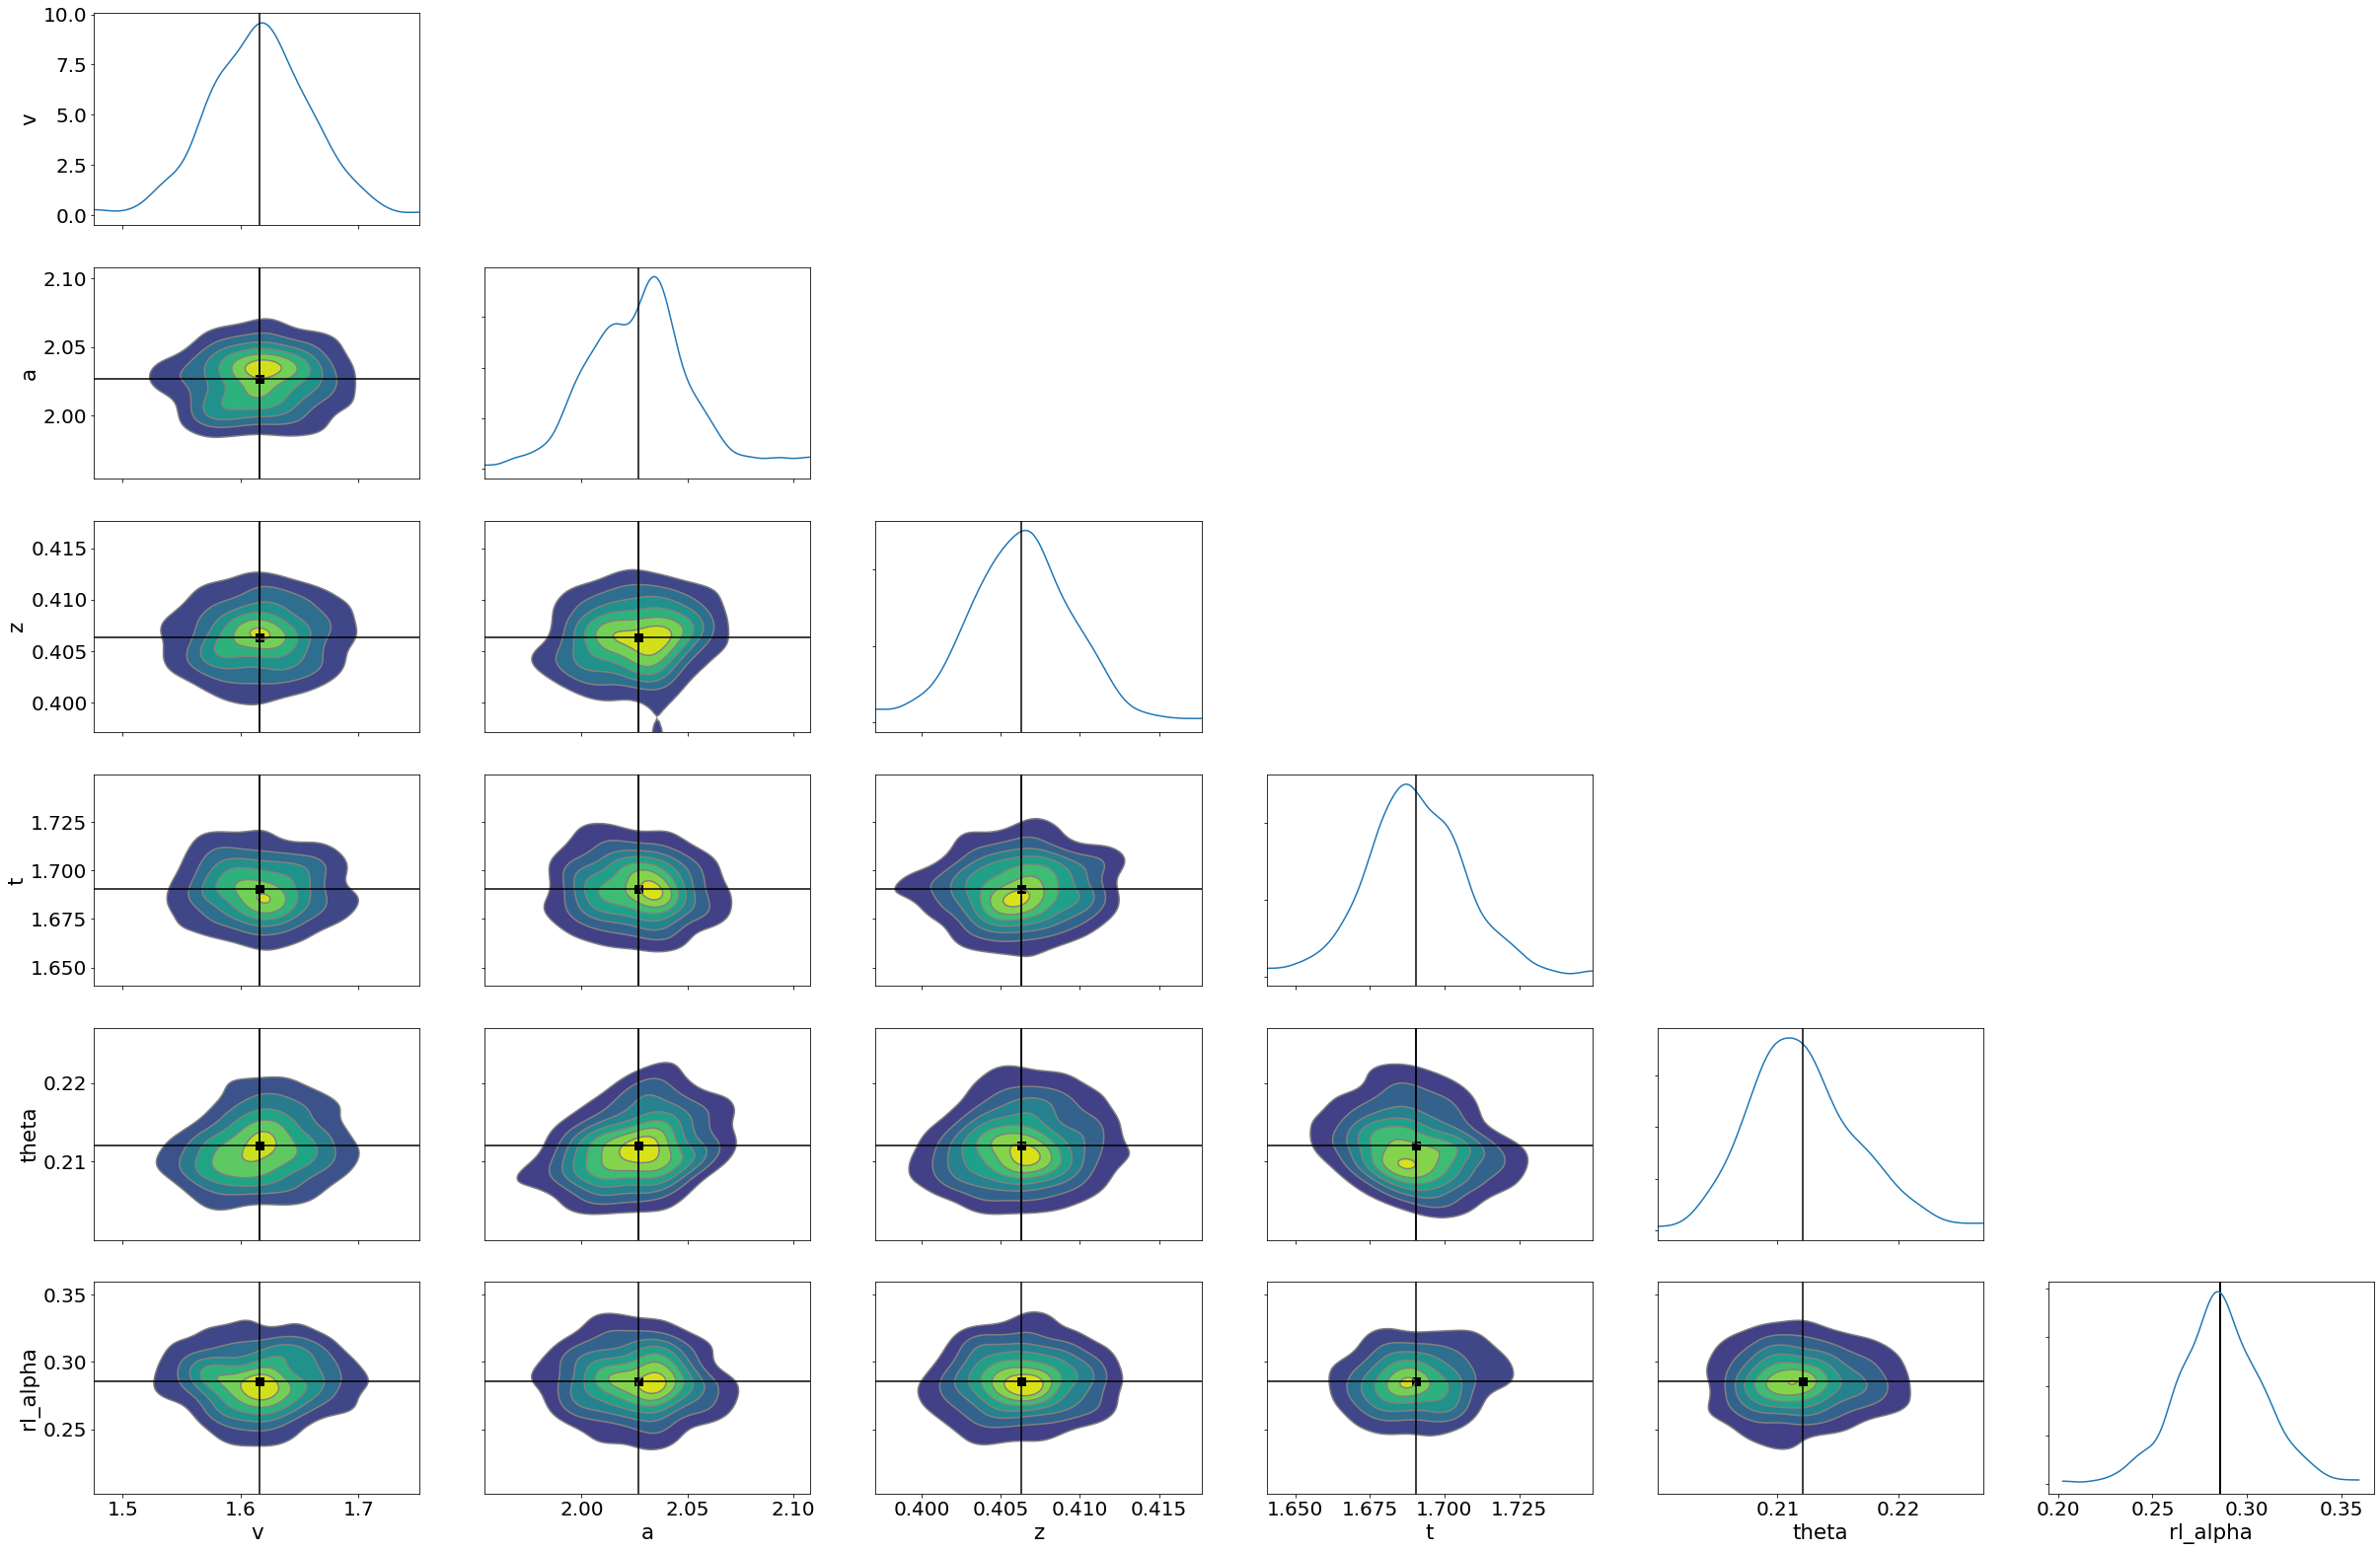

In [12]:
_ = hddm.plotting.plot_posterior_pairs_rlssm(
    tracefile, config_ssm["params"] + config_rl["params"]
)

#### Posterior Predictive Checks

In [13]:
num_posterior_samples = 3
p_lower = {0: 0.15, 1: 0.30, 2: 0.45}
p_upper = {0: 0.85, 1: 0.70, 2: 0.55}
ppc_sdata = hddm.plotting.gen_ppc_rlssm(
    model_ssm,
    config_ssm,
    model_rl,
    config_rl,
    data,
    traces,
    num_posterior_samples,
    p_lower,
    p_upper,
    save_data=True,
    save_name="ppc_data",
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [04:29<00:00, 89.84s/it]


ppc data saved at ./ppc_data.csv


In [5]:
# Load the saved ppc data
ppc_sdata = pd.read_csv('./ppc_data.csv')

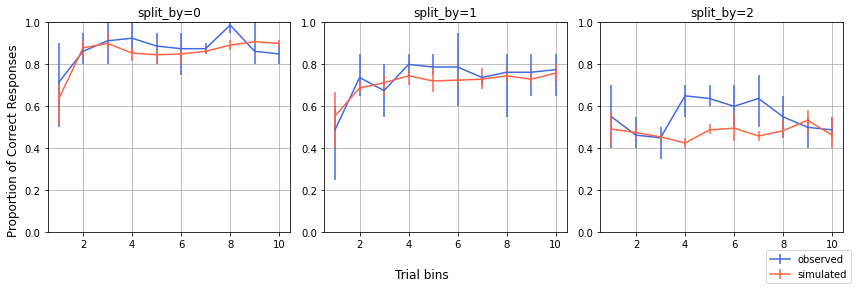

In [8]:
# Plot posterior predictives (proportion of correct responses - bin-wise)
_ = hddm.plotting.plot_ppc_choice_rlssm(data, ppc_sdata, 40, 10)

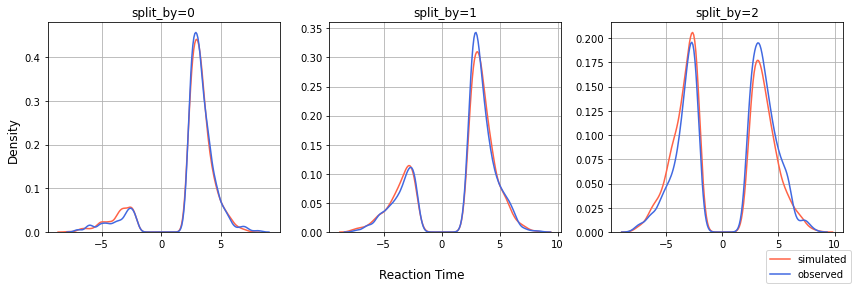

In [9]:
# Plot posterior predictives (RT distributions for both choices)
_ = hddm.plotting.plot_ppc_rt_rlssm(data, ppc_sdata, 40, 0.1)